# Business Analytics und Künstliche Intelligenz

Prof. Dr. Jürgen Bock & Maximilian-Peter Radtke

---

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\bacco\AppData\Local\Temp\ipykernel_24460\1154880369.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Wir werden für die Demonstration der Clustering Verfahren den Iris-datensatz nutzen. Hier wissen wir zwar, dass es drei verschiedene Klassen gibt, aber diese wollen wir nun versuchen ohne die Klassenlabels zu identifizieren.

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris(as_frame=True)
df = data['data']

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


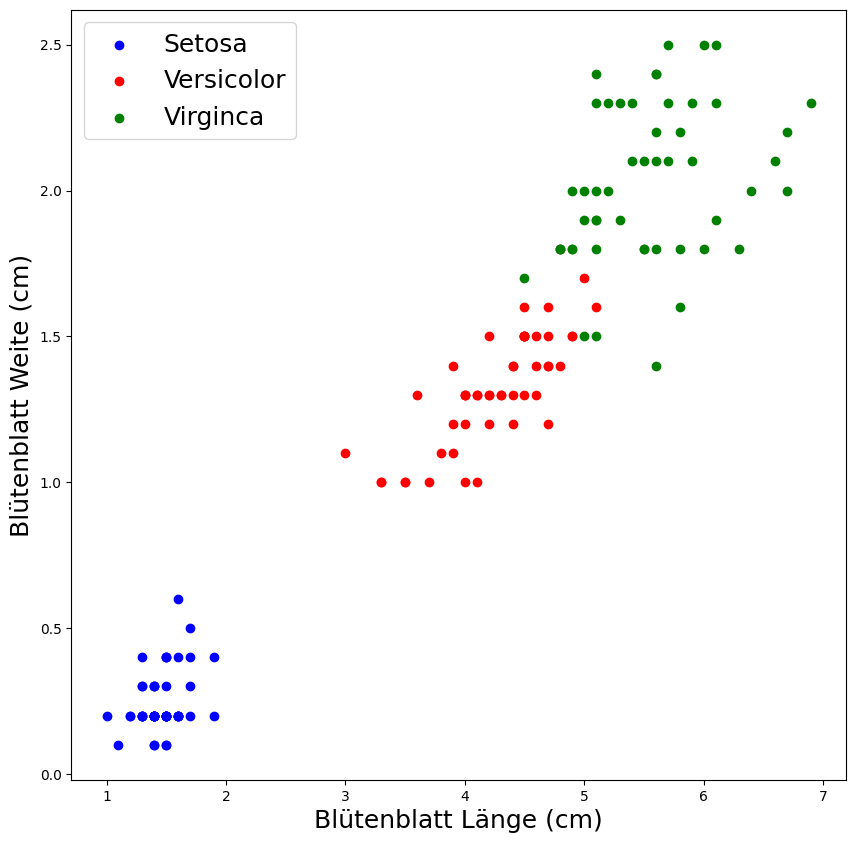

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(df.loc[data['target']==0, 'petal length (cm)'], df.loc[data['target']==0, 'petal width (cm)'], color='blue')
plt.scatter(df.loc[data['target']==1, 'petal length (cm)'], df.loc[data['target']==1, 'petal width (cm)'], color='red')
plt.scatter(df.loc[data['target']==2, 'petal length (cm)'], df.loc[data['target']==2, 'petal width (cm)'], color='green')
plt.legend(['Setosa', 'Versicolor', 'Virginca'], fontsize=18)
plt.xlabel('Blütenblatt Länge (cm)', fontsize=18)
plt.ylabel('Blütenblatt Weite (cm)', fontsize=18)
plt.show()

Auf Basis der Blütenblatt Länge und Weite lassen sich die verschiedenen Schwertlilienarten also recht gut identifizieren. Diese 3 Cluster wollen wir nun automatisch generieren.

Entsprechend kreieren wir eine Variable für unsere Trainingsdaten.

In [9]:
X = df[['petal length (cm)', 'petal width (cm)']]

## K-Means Clustering

Für das Clustern mittels K-Means nutzen wir von Sklearn die [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 'K-Means Dokumentation') Funktion.

In [19]:
from sklearn.cluster import KMeans

In [25]:
# K-Means mit einer zufälligen Anfangsinitialisierung
kmeans1 = KMeans(n_clusters=3, algorithm='lloyd', random_state=25)
kmeans1.fit(X)

KMeans(n_clusters=3, random_state=25)

In [26]:
# Ausgabe der erzeugten Cluster
kmeans1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
# K-Means mit einer zweiten zufälligen Anfangsinitialisierung
kmeans2 = KMeans(n_clusters=3, algorithm='lloyd', random_state=57)
kmeans2.fit(X)

KMeans(n_clusters=3, random_state=57)

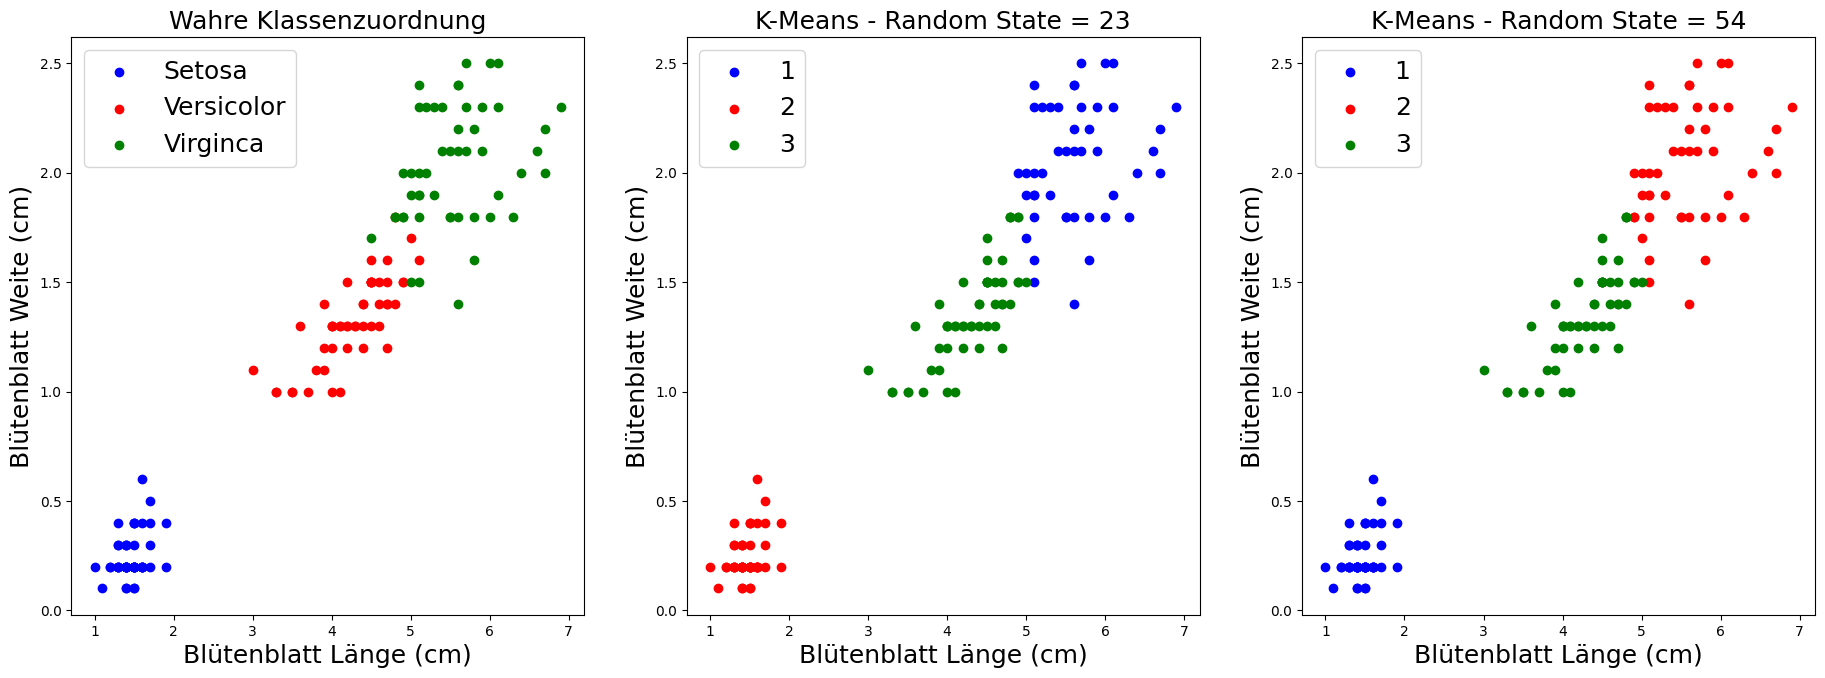

In [28]:
# Vergleich der K-Means Cluster mit den tatsächlichen Klassen

# Initialisierung der Subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(22.5,7.5))

# Erstellen Scatterplot für wahre Labels
ax0.scatter(df.loc[data['target']==0, 'petal length (cm)'], df.loc[data['target']==0, 'petal width (cm)'], color='blue')
ax0.scatter(df.loc[data['target']==1, 'petal length (cm)'], df.loc[data['target']==1, 'petal width (cm)'], color='red')
ax0.scatter(df.loc[data['target']==2, 'petal length (cm)'], df.loc[data['target']==2, 'petal width (cm)'], color='green')
ax0.legend(['Setosa', 'Versicolor', 'Virginca'], fontsize=18)
ax0.set_xlabel('Blütenblatt Länge (cm)', fontsize=18)
ax0.set_ylabel('Blütenblatt Weite (cm)', fontsize=18)
ax0.set_title('Wahre Klassenzuordnung', fontsize=18)

# Erstellen Scatterplot für ersten random state
ax1.scatter(df.loc[kmeans1.labels_==0, 'petal length (cm)'], df.loc[kmeans1.labels_==0, 'petal width (cm)'], color='blue')
ax1.scatter(df.loc[kmeans1.labels_==1, 'petal length (cm)'], df.loc[kmeans1.labels_==1, 'petal width (cm)'], color='red')
ax1.scatter(df.loc[kmeans1.labels_==2, 'petal length (cm)'], df.loc[kmeans1.labels_==2, 'petal width (cm)'], color='green')
ax1.legend(['1', '2', '3'], fontsize=18)
ax1.set_xlabel('Blütenblatt Länge (cm)', fontsize=18)
ax1.set_ylabel('Blütenblatt Weite (cm)', fontsize=18)
ax1.set_title('K-Means - Random State = 23', fontsize=18)

# Erstellen Scatterplot für zweiten random state
ax2.scatter(df.loc[kmeans2.labels_==0, 'petal length (cm)'], df.loc[kmeans2.labels_==0, 'petal width (cm)'], color='blue')
ax2.scatter(df.loc[kmeans2.labels_==1, 'petal length (cm)'], df.loc[kmeans2.labels_==1, 'petal width (cm)'], color='red')
ax2.scatter(df.loc[kmeans2.labels_==2, 'petal length (cm)'], df.loc[kmeans2.labels_==2, 'petal width (cm)'], color='green')
ax2.legend(['1', '2', '3'], fontsize=18)
ax2.set_xlabel('Blütenblatt Länge (cm)', fontsize=18)
ax2.set_ylabel('Blütenblatt Weite (cm)', fontsize=18)
ax2.set_title('K-Means - Random State = 54', fontsize=18)

plt.show()

## Hierarchisches Clustern

Für agglomeratives (bottom up) hierarchisches Clustern hat Sklearn auch eine Funktion. Diese heißt [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html 'Dokumentation agglomeratives Clustern').

In [29]:
from sklearn.cluster import AgglomerativeClustering

Zunächst nutzen wir die Funktion um zu versuchen 3 Cluster zu identifizieren und übergeben daher den Parameter `n_clusters=3`. Außerdem versuchen wir das Problem einmal mit Single Linkage und einmal mit Complete Linkage zu lösen.

In [30]:
# Hierarchisches Clustern Single Linkage
AggCluSing = AgglomerativeClustering(n_clusters=3, linkage='single')
AggCluSing.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [31]:
# Ausgabe der Labels
AggCluSing.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
# Hierarchisches Clustern Complete Linkage
AggCluComp = AgglomerativeClustering(n_clusters=3, linkage='complete')
AggCluComp.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=3)

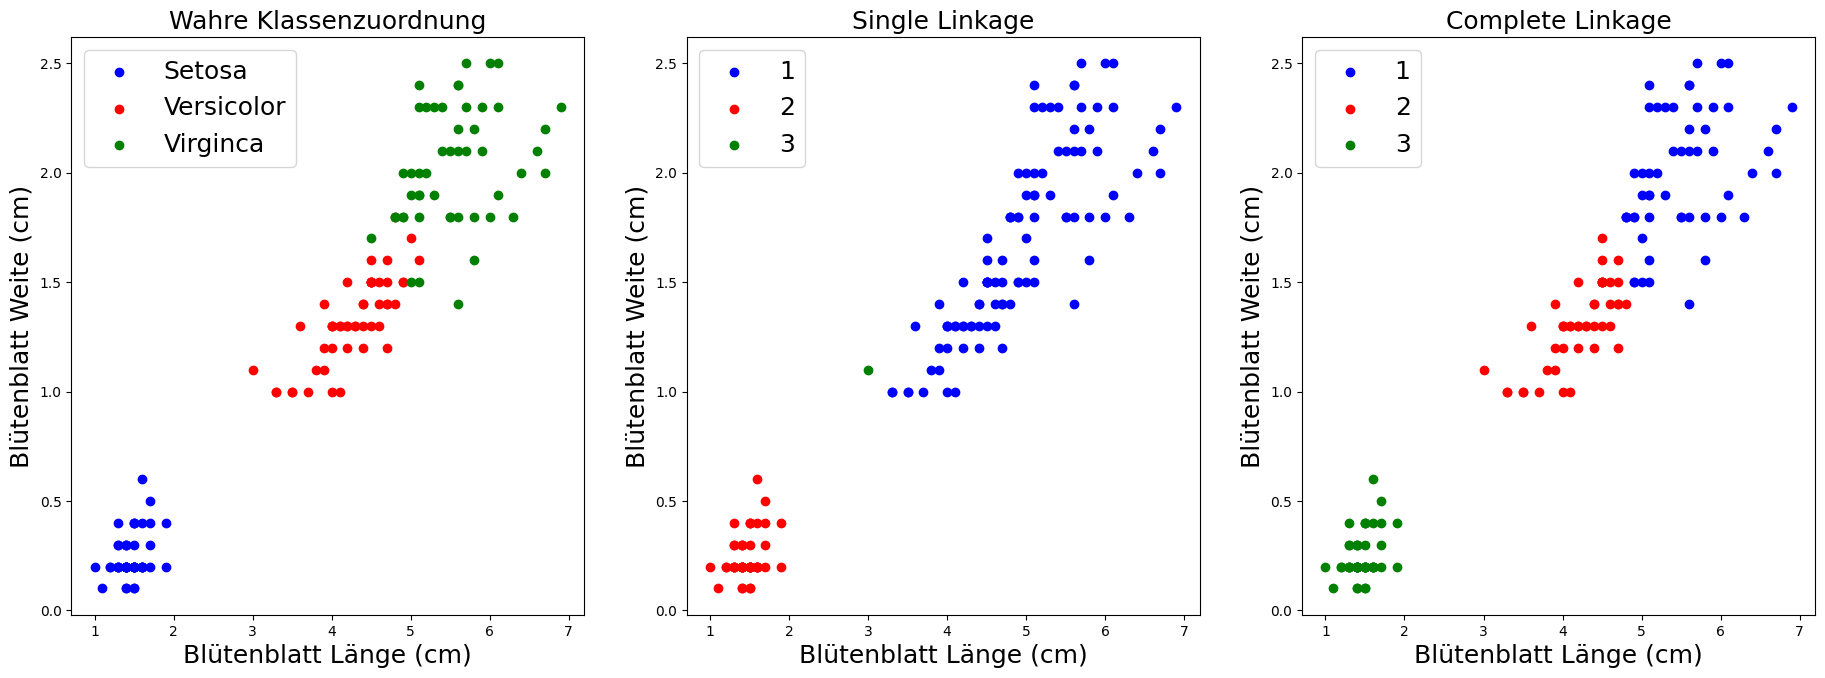

In [33]:
# Vergleich der hierarchisches Clustern mit den tatsächlichen Klassen

# Initialisierung der Subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(22.5,7.5))

# Erstellen Scatterplot für wahre Labels
ax0.scatter(df.loc[data['target']==0, 'petal length (cm)'], df.loc[data['target']==0, 'petal width (cm)'], color='blue')
ax0.scatter(df.loc[data['target']==1, 'petal length (cm)'], df.loc[data['target']==1, 'petal width (cm)'], color='red')
ax0.scatter(df.loc[data['target']==2, 'petal length (cm)'], df.loc[data['target']==2, 'petal width (cm)'], color='green')
ax0.legend(['Setosa', 'Versicolor', 'Virginca'], fontsize=18)
ax0.set_xlabel('Blütenblatt Länge (cm)', fontsize=18)
ax0.set_ylabel('Blütenblatt Weite (cm)', fontsize=18)
ax0.set_title('Wahre Klassenzuordnung', fontsize=18)

# Erstellen Scatterplot zu Single Linkage
ax1.scatter(df.loc[AggCluSing.labels_==0, 'petal length (cm)'], df.loc[AggCluSing.labels_==0, 'petal width (cm)'], color='blue')
ax1.scatter(df.loc[AggCluSing.labels_==1, 'petal length (cm)'], df.loc[AggCluSing.labels_==1, 'petal width (cm)'], color='red')
ax1.scatter(df.loc[AggCluSing.labels_==2, 'petal length (cm)'], df.loc[AggCluSing.labels_==2, 'petal width (cm)'], color='green')
ax1.legend(['1', '2', '3'], fontsize=18)
ax1.set_xlabel('Blütenblatt Länge (cm)', fontsize=18)
ax1.set_ylabel('Blütenblatt Weite (cm)', fontsize=18)
ax1.set_title('Single Linkage', fontsize=18)

# Erstellen Scatterplot zu Complete Linkage
ax2.scatter(df.loc[AggCluComp.labels_==0, 'petal length (cm)'], df.loc[AggCluComp.labels_==0, 'petal width (cm)'], color='blue')
ax2.scatter(df.loc[AggCluComp.labels_==1, 'petal length (cm)'], df.loc[AggCluComp.labels_==1, 'petal width (cm)'], color='red')
ax2.scatter(df.loc[AggCluComp.labels_==2, 'petal length (cm)'], df.loc[AggCluComp.labels_==2, 'petal width (cm)'], color='green')
ax2.legend(['1', '2', '3'], fontsize=18)
ax2.set_xlabel('Blütenblatt Länge (cm)', fontsize=18)
ax2.set_ylabel('Blütenblatt Weite (cm)', fontsize=18)
ax2.set_title('Complete Linkage', fontsize=18)

plt.show()

Ein Vorteil von hierarchischem Clustern, ist es das Dendrogramm ausgeben zu lassen. Hierfür nutzen wir die [`dendrogramm`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram 'Dendrogramm Dokumentation') Funktion aus `scipy`.

In [34]:
from scipy.cluster.hierarchy import dendrogram

Um das Dendrogramm zu erzeugen müssen zusätzlich einige Schritte vorgenommen werden, welche in der selbstdefinierten Funktion `plot_dendrogram` zusammengefasst werden. Diese Funktion ist ein Beispiel von scikit-learn und kann [hier](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py) betrachtet werden.

**Die Funktion muss nicht nachvollzogen und verstanden werden.**

In [35]:
def plot_dendrogram(model, **kwargs):
    # Erstelle Linkage Matirx und plotte das Dendrogramm
    # Create linkage matrix and then plot the dendrogram
    
    # Berechne die Anzahl der Sammples unter jedem Knoten
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plotte das entsprechende Dendrogramm
    dendrogram(linkage_matrix, **kwargs)

Als nächstes erstellen wir ein Modell. Dass wirklich alle Partitionen berechnet werden und das komplette hierarchische Modell erstellt wird übergeben wir die Parameter `distance_threshold` und `n_clusters`.

In [36]:
# Erstelle Modell mit kompletter Hierarchie
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Nun können wir das komplette Dendrogramm plotten.

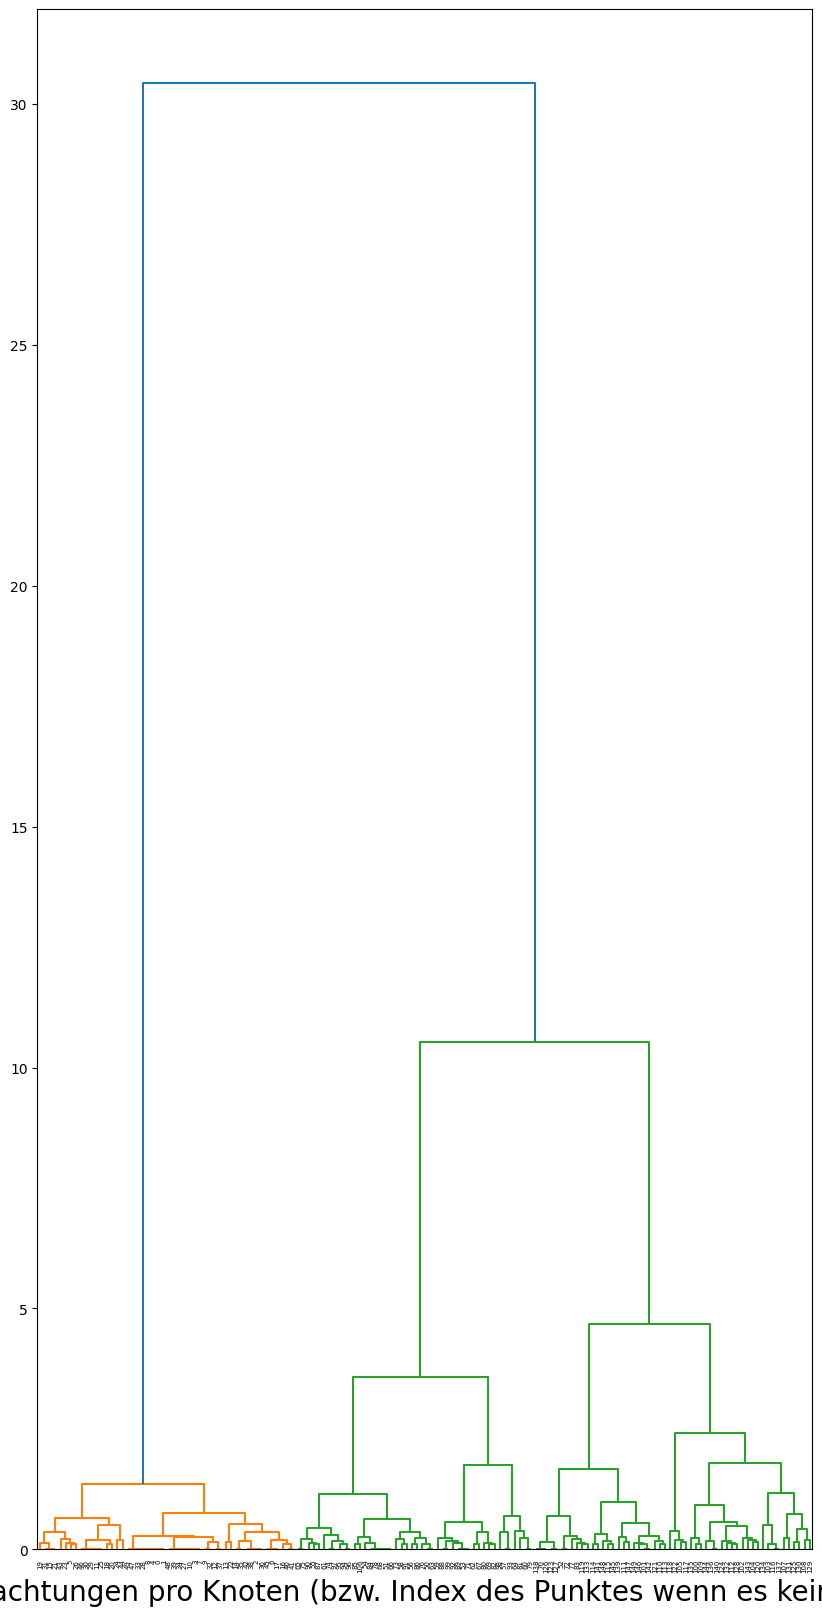

In [37]:
plt.figure(figsize=(10,20))
plot_dendrogram(model)
plt.xlabel('Anzahl an Beobachtungen pro Knoten (bzw. Index des Punktes wenn es keine Klammern gibt)', fontsize=20)
plt.show()

Oder auch eine abgeschnittenen Form, welche etwas übersichtlicher ist.

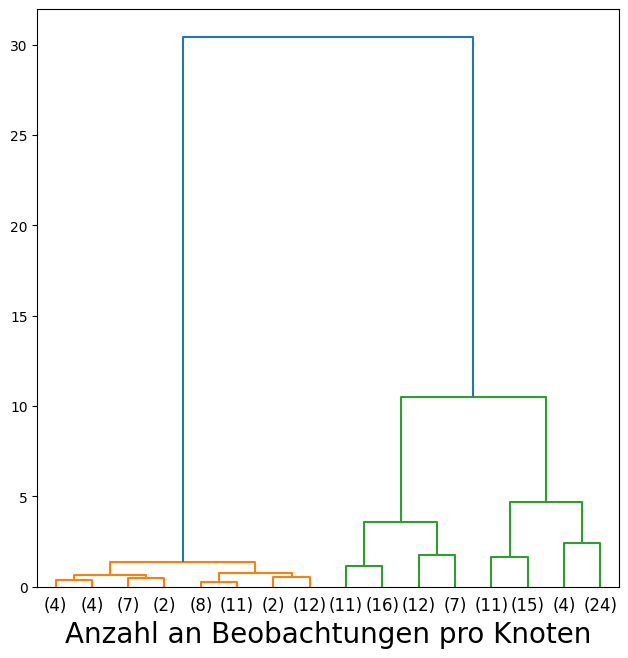

In [38]:
plt.figure(figsize=(7.5,7.5))
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel('Anzahl an Beobachtungen pro Knoten', fontsize=20)
plt.show()

# Übungsaufgaben

Wir wollen uns die Verhaftungen pro Bundesstaat in den USA etwas genauer anschauen. Laden Sie hierfür die Datei `USarrests.csv` von Moodle herunter und laden Sie sie in Python.

Wir möchten hierarchisches Clustern auf den Staaten ausführen. Das heißt die verschiedenen Staaten in einzelne Cluster einordnen.

In [40]:
usarrests = pd.read_csv('data/USarrests.csv')

In [41]:
usarrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [42]:
# Umbennen der Staatspalte
usarrests.rename(columns={'Unnamed: 0':'State'}, inplace=True)

## Aufgabe 1

Nutzen Sie Bottom Up hierarchisches Clustern mit complete linkage und euklidischem Abstand um die Staaten zu clustern und erstellen Sie drei verschiedene Cluster. Welcher Staat gehört zu welchem Cluster?

In [43]:
# Wähle alle Spalten außer die Staatsspalte
Xarrests = usarrests.drop('State', axis=1)

In [44]:
# Erzeuge 3 Cluster mittels hierarchischem Clustern und complete linkage
AggCluArrComp = AgglomerativeClustering(n_clusters=3, linkage='complete')
AggCluArrComp.fit(Xarrests)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [45]:
# Gebe Staaten pro Cluster aus
usarrests['LabelCompleteLinkage'] = AggCluArrComp.labels_

In [46]:
for i in range(3):
    print('Cluster', str(i), ':', usarrests.loc[usarrests.LabelCompleteLinkage == i, 'State'].values)
    print('\n')

Cluster 0 : ['Alabama' 'Alaska' 'Arizona' 'California' 'Delaware' 'Florida' 'Illinois'
 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Nevada' 'New Mexico'
 'New York' 'North Carolina' 'South Carolina']


Cluster 1 : ['Connecticut' 'Hawaii' 'Idaho' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Maine' 'Minnesota' 'Montana' 'Nebraska' 'New Hampshire' 'North Dakota'
 'Ohio' 'Pennsylvania' 'South Dakota' 'Utah' 'Vermont' 'West Virginia'
 'Wisconsin']


Cluster 2 : ['Arkansas' 'Colorado' 'Georgia' 'Massachusetts' 'Missouri' 'New Jersey'
 'Oklahoma' 'Oregon' 'Rhode Island' 'Tennessee' 'Texas' 'Virginia'
 'Washington' 'Wyoming']




## Aufgabe 2

Nutzen Sie Bottom Up hierarchisches Clustern mit single linkage und euklidischem Abstand um die Staaten zu clustern und erstellen Sie drei verschiedene Cluster. Welcher Staat gehört zu welchem Cluster?

In [47]:
# Erzeuge 3 Cluster mittels hierarchischem Clustern und single linkage
AggCluArrSing = AgglomerativeClustering(n_clusters=3, linkage='single')
AggCluArrSing.fit(Xarrests)
# Gebe Staaten pro Cluster aus
usarrests['LabelSingleLinkage'] = AggCluArrSing.labels_

In [48]:
for i in range(3):
    print('Cluster', str(i), ':', usarrests.loc[usarrests.LabelSingleLinkage == i, 'State'].values)
    print('\n')

Cluster 0 : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Cluster 1 : ['North Carolina']


Cluster 2 : ['Florida']




## Aufgabe 3

Wiederholen Sie Aufgaben 1 und 2, aber skalieren Sie Daten vorher. Wie unterscheiden sich die Ergebnisse? Ist es sinnvoll die Daten vorher zu skalieren?

**Tip:** Nutzen Sie den [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 'MinMaxScaler Dokumentation') von Sklearn um die Daten zu skalieren.

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Initalisiere Skalierungsobjekt
scaler = MinMaxScaler()
# Fitte Skalierungsobjekt
scaler.fit(Xarrests)
# Skaliere Daten
XarrestsScaled = scaler.transform(Xarrests)

In [51]:
# Wiederhole hierarchisches Cluster mit complete und single linkage

# Erzeuge 3 Cluster mittels hierarchischem Clustern und complete linkage
AggCluArrCompScale = AgglomerativeClustering(n_clusters=3, linkage='complete')
AggCluArrCompScale.fit(XarrestsScaled)
# Gebe Staaten pro Cluster aus
usarrests['LabelCompleteLinkageScale'] = AggCluArrCompScale.labels_

# Gebe Cluster für complete linkage mit skalierten Daten aus
print('Complete Linkage mit skalierten Daten:')
print('\n')
for i in range(3):
    print('Cluster', str(i), ':', usarrests.loc[usarrests.LabelCompleteLinkageScale == i, 'State'].values)
    print('\n')

# Erzeuge 3 Cluster mittels hierarchischem Clustern und single linkage
AggCluArrSingScale = AgglomerativeClustering(n_clusters=3, linkage='single')
AggCluArrSingScale.fit(XarrestsScaled)
# Gebe Staaten pro Cluster aus
usarrests['LabelSingleLinkageScale'] = AggCluArrSingScale.labels_

# Gebe Cluster für single linkage mit skalierten Daten aus
print('Single Linkage mit skalierten Daten:')
print('\n')
for i in range(3):
    print('Cluster', str(i), ':', usarrests.loc[usarrests.LabelSingleLinkageScale == i, 'State'].values)
    print('\n')

Complete Linkage mit skalierten Daten:


Cluster 0 : ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


Cluster 1 : ['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Indiana' 'Kansas'
 'Kentucky' 'Massachusetts' 'Minnesota' 'New Jersey' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'Utah' 'Virginia' 'Washington'
 'Wisconsin' 'Wyoming']


Cluster 2 : ['Idaho' 'Iowa' 'Maine' 'Montana' 'Nebraska' 'New Hampshire'
 'North Dakota' 'South Dakota' 'Vermont' 'West Virginia']


Single Linkage mit skalierten Daten:


Cluster 0 : ['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Neva